# Binary Classification


In [1]:
#data set= Credit_Card_Fraud_Detection from Kaggle

In [2]:
import pandas as pd
import numpy as np
da=pd.read_csv("Cardfrauddetection.csv")
da

,Unnamed: 0,Customer_ID,A_1,A_2,A_3,A_4,A_5,A_6,A_7,A_8,A_9,A_10,A_11,A_12,A_13,A_14,class
0,0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [85]:
da=da.iloc[:,1:]

In [86]:
da

,Customer_ID,A_1,A_2,A_3,A_4,A_5,A_6,A_7,A_8,A_9,A_10,A_11,A_12,A_13,A_14,class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [87]:
da["A_4"]=(da["A_4"]+da["A_5"]+da["A_6"])/len(da["A_4"])

In [88]:
daa=pd.DataFrame(data=da)

In [89]:
daa=daa.drop(columns=['A_5','A_6'])

In [90]:
daa=daa.iloc[:100,:]
daa

,Customer_ID,A_1,A_2,A_3,A_4,A_7,A_8,A_9,A_10,A_11,A_12,A_13,A_14,class
0,15776156,1,22.08,11.460,0.014493,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,0.020290,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,0.013043,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,0.013043,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,0.017391,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,15655464,1,21.25,1.500,0.021739,1.500,0,0,0,0,2,150,9,1
96,15783883,0,38.92,1.665,0.017391,0.250,0,0,0,0,2,0,391,0
97,15787693,1,31.83,0.040,0.017391,0.040,0,0,0,0,2,0,1,0
98,15664793,0,17.33,9.500,0.017391,1.750,0,1,10,1,2,0,11,0


In [91]:
daa["A_8"]=(daa["A_8"]+daa["A_9"]+daa["A_10"]+daa["A_11"]+daa["A_12"])/len(daa["A_8"])

In [92]:
daa=daa.drop(columns=['A_9','A_10','A_11','A_12'])

In [93]:
daa

,Customer_ID,A_1,A_2,A_3,A_4,A_7,A_8,A_13,A_14,class
0,15776156,1,22.08,11.460,0.014493,1.585,0.03,100,1213,0
1,15739548,0,22.67,7.000,0.020290,0.165,0.02,160,1,0
2,15662854,0,29.58,1.750,0.013043,1.250,0.03,280,1,0
3,15687688,0,21.67,11.500,0.013043,0.000,0.16,0,1,1
4,15715750,1,20.17,8.170,0.017391,1.960,0.18,60,159,1
...,...,...,...,...,...,...,...,...,...,...
95,15655464,1,21.25,1.500,0.021739,1.500,0.02,150,9,1
96,15783883,0,38.92,1.665,0.017391,0.250,0.02,0,391,0
97,15787693,1,31.83,0.040,0.017391,0.040,0.02,0,1,0
98,15664793,0,17.33,9.500,0.017391,1.750,0.14,0,11,0


In [94]:
daa["A_1"]=(daa["A_1"]+daa["A_2"]+daa["A_3"]+daa["A_4"]+daa["A_7"]+daa["A_8"]+daa["A_13"]+daa["A_14"])/len(daa["A_1"])

In [95]:
daa=daa.drop(columns=["A_2","A_3","A_4","A_7","A_8","A_13","A_14"])

In [96]:
daa

,Customer_ID,A_1,class
0,15776156,13.491695,0
1,15739548,1.908753,0
2,15662854,3.136230,0
3,15687688,0.343430,1
4,15715750,2.504974,1
...,...,...,...
95,15655464,1.842917,1
96,15783883,4.318724,0
97,15787693,0.339474,0
98,15664793,0.397374,0


In [97]:
x=daa.iloc[:,1:-1].values

In [98]:
x

array([[ 13.49169493],
       [  1.9087529 ],
       [  3.13623043],
       [  0.34343043],
       [  2.50497391],
       [  1.19001087],
       [  1.86078043],
       [  6.70300435],
       [  7.46865942],
       [  2.2068029 ],
       [ 11.51874783],
       [  5.23560435],
       [  3.75399638],
       [ 10.49564783],
       [  3.8575529 ],
       [ 27.46194493],
       [  3.73671739],
       [  7.08747391],
       [  1.67408043],
       [ 34.17804638],
       [ 12.93832391],
       [  1.81395942],
       [  2.12701594],
       [  2.05584493],
       [  4.61912391],
       [  0.41863333],
       [  2.94783043],
       [182.47334638],
       [  2.8474029 ],
       [ 22.7284529 ],
       [  4.96106087],
       [  2.17983333],
       [  3.65229638],
       [  6.12892536],
       [  5.24023841],
       [  4.46924348],
       [  0.62547391],
       [  1.34251739],
       [ 13.2475529 ],
       [ 22.88393986],
       [  0.25312536],
       [  2.13665942],
       [ 53.29189783],
       [  2

In [99]:
y=daa.iloc[:,2].values

In [100]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x,y)

LogisticRegression()

<Axes: xlabel='A_1', ylabel='class'>

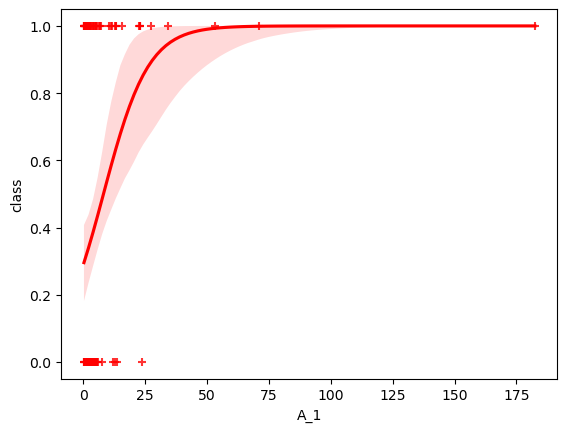

In [101]:
import seaborn as sns
sns.regplot(x='A_1',y='class',data=daa,logistic=True,marker='+',color='red')

In [102]:
from sklearn.preprocessing import StandardScaler

In [109]:
sc=StandardScaler()
x=sc.fit_transform(x)

mo

In [110]:
model.predict([[0.89702342]])

array([0], dtype=int64)

In [111]:
model.predict([[10.92392]])

array([1], dtype=int64)

In [112]:
model.predict([[9.92392]])

array([1], dtype=int64)

In [113]:
model.predict([[0.0000023]])

array([0], dtype=int64)

In [114]:
model.score(x,y)

0.57

In [1]:
# data set= Social_Network_Ads.csv from= Kaggle

In [115]:
import pandas as pd

In [3]:
df=pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
X=df.iloc[:,[2,3]].values
Y=df.iloc[:,4].values

<Axes: xlabel='EstimatedSalary', ylabel='Purchased'>

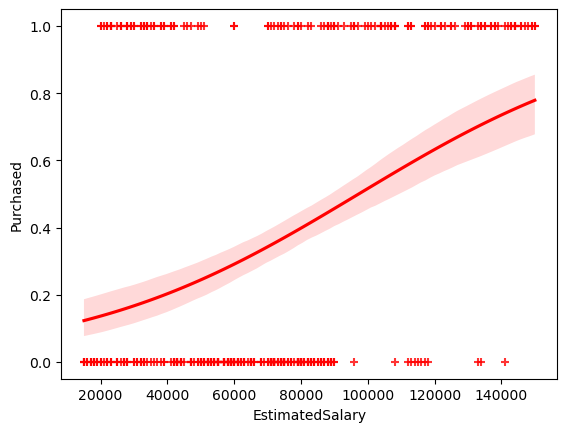

In [5]:
import seaborn as sns
sns.regplot(x='EstimatedSalary',y='Purchased',data=df,logistic=True,marker='+',color='red')

In [6]:
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [8]:
from sklearn.linear_model import LogisticRegression
aq=LogisticRegression()
aq.fit(X,Y)

LogisticRegression()

In [9]:
aq.predict([[20,982344]])

array([1], dtype=int64)

In [10]:
aq.score(X,Y)

0.84

In [11]:
model=LogisticRegression(solver='liblinear')

In [13]:
model.fit(X,Y)

LogisticRegression(solver='liblinear')

In [16]:
model.predict_proba(X)[:,-1]

array([0.00117852, 0.03648136, 0.01159658, 0.02258691, 0.00771583,
       0.02332887, 0.05343534, 0.59448087, 0.00675362, 0.14366587,
       0.03836814, 0.0155556 , 0.0132396 , 0.01826924, 0.00759253,
       0.07061651, 0.37009697, 0.28329986, 0.34360385, 0.4539401 ,
       0.257219  , 0.56515978, 0.55285229, 0.257219  , 0.30732027,
       0.33243264, 0.49921793, 0.40941153, 0.02185488, 0.01479131,
       0.08735961, 0.24580668, 0.00163883, 0.0182913 , 0.06441146,
       0.04555423, 0.03111132, 0.03267148, 0.02971183, 0.00968322,
       0.00611573, 0.06430045, 0.41030339, 0.01084904, 0.06539664,
       0.00287055, 0.03020139, 0.02049673, 0.36746269, 0.1358609 ,
       0.00527915, 0.0021718 , 0.07741378, 0.0401348 , 0.02332887,
       0.01123029, 0.00721662, 0.05598525, 0.00216914, 0.32979019,
       0.00674949, 0.0389946 , 0.01301339, 0.35208364, 0.98135676,
       0.01238747, 0.00344033, 0.02189433, 0.00954039, 0.07277718,
       0.0311855 , 0.00447796, 0.00166663, 0.34825002, 0.01826

In [17]:
model.score(X,Y)

0.8425

In [18]:
model.predict([[20,982344]])

array([1], dtype=int64)

In [2]:
import pandas as pd
im=pd.read_csv("HR_comma_sep.csv")
im

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [5]:
av=im.groupby("left").mean()
av

C:\Users\srisa\AppData\Local\Temp\ipykernel_14172\2972643772.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  av=im.groupby("left").mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [8]:
df=pd.DataFrame(data=im)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [12]:
df.Department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [1]:
import pandas as pd
import numpy as np
add=pd.read_csv("titanic2.csv")
add

,Survived,Pclass,Sex,Age,Fare,Embarked,relatives,Title
0,0.0,3.0,0.0,2.0,0.0,0.0,1.0,1.0
1,1.0,1.0,1.0,5.0,3.0,1.0,1.0,3.0
2,1.0,3.0,1.0,3.0,0.0,0.0,0.0,2.0
3,1.0,1.0,1.0,5.0,3.0,0.0,1.0,3.0
4,0.0,3.0,0.0,5.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
886,0.0,2.0,0.0,3.0,1.0,0.0,0.0,5.0
887,1.0,1.0,1.0,2.0,2.0,0.0,0.0,2.0
888,0.0,3.0,1.0,1.0,2.0,0.0,3.0,2.0
889,1.0,1.0,0.0,3.0,2.0,1.0,0.0,1.0


In [2]:
df=pd.DataFrame(data=add)

In [4]:
avd=df.groupby('Survived').mean()
avd          #MOST IMPORTANT STEP IN LOGISTIC REGRESSION 

,Pclass,Sex,Age,Fare,Embarked,relatives,Title
Survived,,,,,,,
0.0,2.531876,0.147541,3.608379,1.214936,0.307832,0.883424,1.397086
1.0,1.950292,0.681287,3.388889,2.017544,0.447368,0.938596,2.260234


In [5]:
we=df[['Pclass','Sex','Age']]

In [6]:
X=we
y=df.Survived

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.4,random_state=0)

In [8]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [9]:
model.predict([[0.96784,1.4567,2.95677]])

C:\Users\srisa\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1.])

In [10]:
model.score(x_test,y_test)

0.7775700934579439

In [47]:
#IRIS DataSet from Kaggle ...........................Logistic Regression

In [1]:
import pandas as pd
te=pd.read_csv("IRIS.csv")
te                                           

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [2]:
te.species[50:70]

50    Iris-versicolor
51    Iris-versicolor
52    Iris-versicolor
53    Iris-versicolor
54    Iris-versicolor
55    Iris-versicolor
56    Iris-versicolor
57    Iris-versicolor
58    Iris-versicolor
59    Iris-versicolor
60    Iris-versicolor
61    Iris-versicolor
62    Iris-versicolor
63    Iris-versicolor
64    Iris-versicolor
65    Iris-versicolor
66    Iris-versicolor
67    Iris-versicolor
68    Iris-versicolor
69    Iris-versicolor
Name: species, dtype: object

In [3]:
df=pd.DataFrame(data=te)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
we=df.groupby('species').mean()
we


,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [6]:
df.species=le.fit_transform(df.species)
df.species

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [7]:
X=df[['sepal_length','sepal_width','petal_length','petal_width']]
y=df.species

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [9]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=2)

In [10]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [11]:
print(model.predict([[5.5,2.9,4.7,1.1]]))


[1]


C:\Users\srisa\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [21]:
model.score(x_test,y_test)

0.9466666666666667

In [22]:
y_predict=model.predict(x_test)
y_predict

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1,
       0, 2, 0, 1, 0, 0, 0, 1, 2, 2, 0, 2, 2, 2, 1, 0, 0, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 2, 1, 1, 0, 1])

In [23]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
cm

array([[27,  0,  0],
       [ 0, 22,  1],
       [ 0,  3, 22]], dtype=int64)

<Axes: >

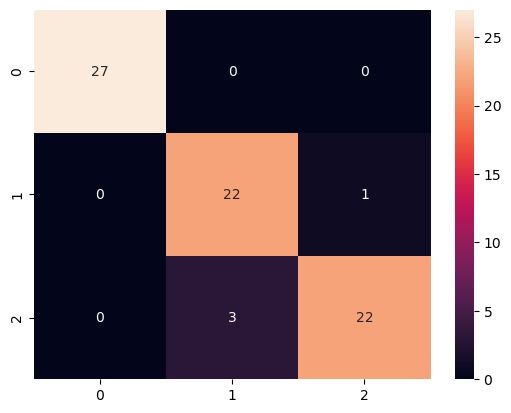

In [24]:
import seaborn as sns
sns.heatmap(cm,annot=True)